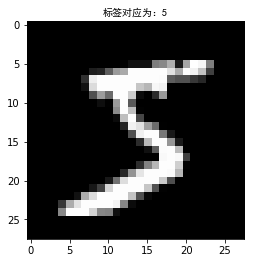

In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt


def readfile(path1,path2):
    with open(path1,'rb') as f1:
        buf1 = f1.read()
    with open(path2,'rb') as f2:
        buf2 = f2.read()
    return buf1, buf2

def get_image(buf1,m):
    image_index = 0
    image_index += struct.calcsize('>IIII')
    im = []
    for _ in range(m):
        temp = struct.unpack_from('>784B', buf1, image_index) # '>784B'的意思就是用大端法读取784个unsigned byte
        im.append(np.reshape(temp,(28, 28)))
        image_index += struct.calcsize('>784B')  # 每次增加784B
    return im

def get_label(buf2,m): # 得到标签数据
    label_index = 0
    label_index += struct.calcsize('>II')
    return struct.unpack_from('>'+str(m)+'B', buf2, label_index)

image_data, label_data = readfile(r'MNIST_data\train-images.idx3-ubyte',r'MNIST_data\train-labels.idx1-ubyte')
im = get_image(image_data,60000)
label = get_label(label_data,60000)

plt.subplot(1, 1, 1)
title = u"标签对应为："+ str(label[0])
plt.title(title, fontproperties='SimHei')
plt.imshow(im[0], cmap='gray')
plt.show()

In [2]:
data_test, label_test = readfile(r'MNIST_data\t10k-images.idx3-ubyte',r'MNIST_data\t10k-labels.idx1-ubyte')
im_test = get_image(image_data,10000)
label_test = get_label(label_data,10000)

In [3]:
import numpy as np
import keras
from keras import backend as K

x_train = np.array(im)
y_train = np.array(label)

x_test = np.array(im_test)
y_test = np.array(label_test)

x_train = x_train.reshape(x_train.shape[0], 28,28, 1) #喂进去是一个四维张量，还有通道值
x_test = x_test.reshape(x_test.shape[0], 28,28, 1)

    
# 把数值类标签转为10维向量，标签对应位为1其余为0
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)
print(y_train.shape)
print(y_train[0],y_test[0])

Using TensorFlow backend.


(60000, 10)
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.] [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

#把数据变成float32更精确
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()

# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=1,
         verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, batch_size=32,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 210s - loss: 0.5154 - acc: 0.8250 - val_loss: 0.0935 - val_acc: 0.9712
Test loss: 0.0935047982499
Test accuracy: 0.9712


In [7]:
from keras.models import load_model
import h5py
#需要先pip install cython  再安装h5py  这里才可以运行

model.save('my_model_mnist.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model2 = load_model('my_model_mnist.h5')


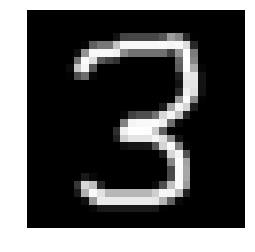

3


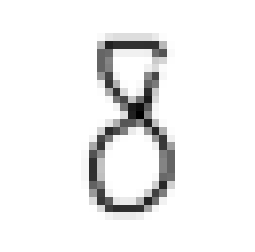

8


In [8]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np

def simglePre(path):
    img = mpimg.imread(path) # 读取和代码处于同一目录下的 lena.png
    # 此时img就已经是一个 np.array 了，可以对它进行任意处理
    from scipy import misc
    small_img = misc.imresize(img, (28,28)) # 第二个参数如果是整数，则为百分比，如果是tuple，则为输出图像的尺寸
    def rgb2gray(rgb):
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    gray = rgb2gray(small_img)    
    plt.imshow(gray,cmap='Greys_r') # 显示图片
    plt.axis('off') # 不显示坐标轴
    plt.show()

    x_single = gray
    x_single = x_single.reshape(1,28,28,1)
    return np.argmax(model2.predict(x_single, batch_size=1, verbose=0))


print(simglePre(r'F:\data\3.png'))
print(simglePre(r'F:\data\8.png'))